<a href="https://colab.research.google.com/github/sourcecode369/deep-nlp/blob/master/text%20classification/Text_Classification_with_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, print_function, division, unicode_literals
%tensorflow_version 2.x
import tensorflow_datasets as tfds
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
%matplotlib inline

def plot_graphs(hisotry, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string],'')
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

TensorFlow 2.x selected.


In [0]:
dataset, info = tfds.load('imdb_reviews/subwords8k',with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [0]:
encoder = info.features['text'].encoder
print('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [0]:
sample_string = 'Hello Tensorflow'

encoded_string = encoder.encode(sample_string)
print('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print('The original string: {}'.format(original_string))

Encoded string is [4025, 222, 6307, 2327, 2934]
The original string: Hello Tensorflow


In [0]:
assert original_string == sample_string

In [0]:
for index in encoded_string:
  print("{} ----> {}".format(index, encoder.decode([index])))

4025 ----> Hell
222 ----> o 
6307 ----> Ten
2327 ----> sor
2934 ----> flow


In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [0]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))

test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [0]:
history = model.fit(train_dataset, 
                    epochs=30, 
                    validation_data = test_dataset, 
                    validation_steps = 30,
                    verbose=1)

Epoch 1/30
391/391 [==============================] - 59s 151ms/step - loss: 0.5359 - accuracy: 0.7226 - val_loss: 0.6143 - val_accuracy: 0.6589
Epoch 2/30
391/391 [==============================] - 55s 141ms/step - loss: 0.3705 - accuracy: 0.8470 - val_loss: 0.3867 - val_accuracy: 0.8370
Epoch 3/30
391/391 [==============================] - 55s 142ms/step - loss: 0.2639 - accuracy: 0.9001 - val_loss: 0.3602 - val_accuracy: 0.8594
Epoch 4/30
391/391 [==============================] - 55s 142ms/step - loss: 0.2021 - accuracy: 0.9268 - val_loss: 0.4299 - val_accuracy: 0.8073
Epoch 5/30
391/391 [==============================] - 55s 141ms/step - loss: 0.1824 - accuracy: 0.9325 - val_loss: 0.5956 - val_accuracy: 0.8281
Epoch 6/30
391/391 [==============================] - 56s 142ms/step - loss: 0.1660 - accuracy: 0.9403 - val_loss: 0.5476 - val_accuracy: 0.7193
Epoch 7/30
391/391 [==============================] - 55s 141ms/step - loss: 0.1354 - accuracy: 0.9523 - val_loss: 0.6221 - val_ac

In [0]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [0]:
def sample_predictions(sentence, pad):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)
  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))
  return (predictions)

In [0]:
sample_pred_text = ('The movie was cool. The animation and the graphics - were out of the worlx. I would recommend this movie to all')
predictions = sample_predictions(sample_pred_text, pad=False)
print(predictions)

[[0.7525396]]


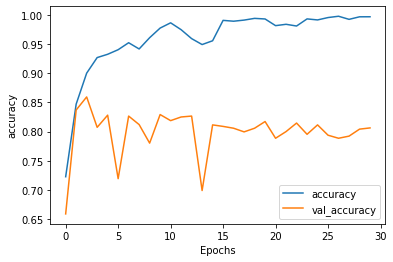

In [0]:
plot_graphs(history, 'accuracy')

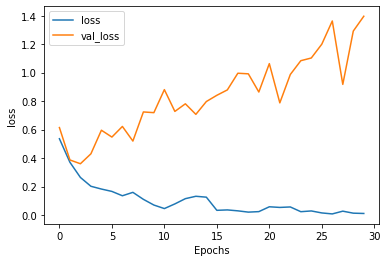

In [0]:
plot_graphs(history, 'loss')

### Stacking two or more LSTM layers

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(encoder.vocab_size, 64),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                             tf.keras.layers.Dense(128,activation='relu'),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')

])

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [0]:
history = model.fit(train_dataset, 
                    epochs=30,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/30
391/391 [==============================] - 196s 500ms/step - loss: 0.6054 - accuracy: 0.6356 - val_loss: 0.4280 - val_accuracy: 0.8057
Epoch 2/30
391/391 [==============================] - 192s 491ms/step - loss: 0.3297 - accuracy: 0.8686 - val_loss: 0.4407 - val_accuracy: 0.8021
Epoch 3/30
391/391 [==============================] - 193s 494ms/step - loss: 0.2477 - accuracy: 0.9066 - val_loss: 0.3394 - val_accuracy: 0.8500
Epoch 4/30
391/391 [==============================] - 193s 494ms/step - loss: 0.2031 - accuracy: 0.9271 - val_loss: 0.4379 - val_accuracy: 0.8083
Epoch 5/30
391/391 [==============================] - 192s 492ms/step - loss: 0.1647 - accuracy: 0.9450 - val_loss: 0.3948 - val_accuracy: 0.8380
Epoch 6/30
391/391 [==============================] - 194s 496ms/step - loss: 0.1373 - accuracy: 0.9570 - val_loss: 0.5340 - val_accuracy: 0.8276
Epoch 7/30
391/391 [==============================] - 194s 496ms/step - loss: 0.1110 - accuracy: 0.9672 - val_loss: 0.4654 -